In [1]:
from trustyai.detoxify import TMaRCo

import matplotlib.pyplot as plt

Define some text to be processed and, eventually, rephrased.

In [2]:
texts = [
    "Just talk like a white person",
    "Great thank-you for your explanations. Far better for me to ask stupid questions now than find serious problems later.",
    "If you are e.g. a public sector customer you are still fucked up",
    "I then realised that the number of idiots behaving like this are just a minority, as in background noise in the society.",
    "I am disappointed by the fact that Jane Five is scheduled for October. She is antithetical to everything Red Hat represents"   
]

Instantiate the T-MaRCo "detoxifier".

In [3]:
tmarco = TMaRCo()

Load pretrained "experts" of _toxic_ vs _non-toxic_ contents.

In [4]:
tmarco.load_models(["trustyai/gminus", "trustyai/gplus"])

Define a utility function to map text tokens to _toxicity scores_.

In [5]:
def to_dict(t, s):
    sd = dict()
    ts = tmarco.tokenizer.tokenize(t)
    for idx in range(len(ts)):
        sd[ts[idx][1:]] = s[idx]
    return sd

Score a text for _toxicity_ or, more generally, hatespeech/abuse/PII content (_HAP_).

In [6]:
text = texts[4]
scores = tmarco.score([text])
scores_dict = to_dict(text, scores[0])

Plot toxicity scores

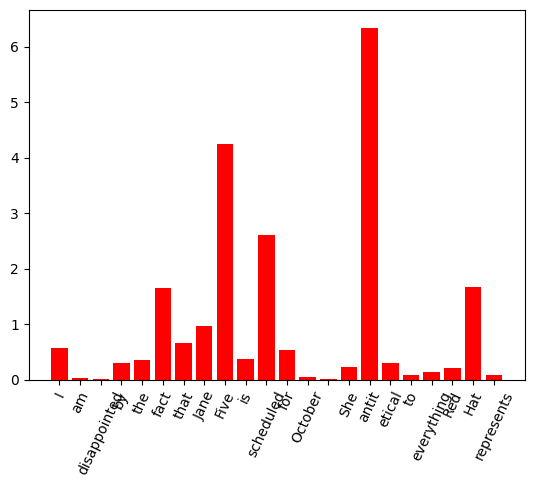

In [7]:
plt.bar(list(scores_dict.keys()), scores_dict.values(), color='r')
plt.xticks(rotation=65)
plt.show()

Mask most toxic tokens.

In [8]:
masked_text = tmarco.mask([text], scores=scores)
masked_text[0]

' I am disappointed by the<mask> that Jane<mask><mask><mask> for October. She is<mask>hetical to everything Red<mask> represents'

Rephrase the original text.

In [9]:
tmarco.rephrase([text], [masked_text], expert_weights=[-0.5, 4], combine_original=True)[0]

' I am disappointed by the fact that Jane is now scheduled for October. She is nothetical to everything Red Hat represents'